<a href="https://colab.research.google.com/github/RJRPotnuru/Minor-Project/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]
datadir='/content/drive/MyDrive/ML Smartknower /Minor Project/Minor Project Dataset'
CATEGORIES=['Burger','French Fries','Pizza']

for i in CATEGORIES:
  path=os.path.join(datadir,i)
  num=CATEGORIES.index(i)
  for img in os.listdir(path):
   
    img_arr= imread(os.path.join(path,img))

    img_resized=resize(img_arr,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(num)

flat_data=np.array(flat_data)
images=np.array(images)
target=np.array(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

array([50, 50, 50])

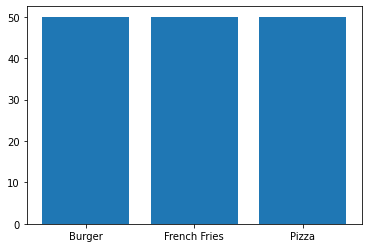

In [ ]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)
count

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.1,random_state=1)

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}            
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
y_pred=clf.predict(x_test)
y_pred

array([0, 1, 2, 1, 2, 1, 2, 2, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 2, 1,
       0, 0, 2, 1, 0, 0, 1, 2])

In [36]:
y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.6666666666666666

In [38]:
confusion_matrix(y_pred,y_test)

array([[8, 3, 0],
       [1, 7, 1],
       [2, 3, 5]])

In [40]:
model=pickle.load(open('img_model.p','rb'))

ENTER YOUR URLhttps://images.all-free-download.com/images/graphicthumb/pizza_01_hd_pictures_167414.jpg
PREDICTED OUTPUT:Pizza


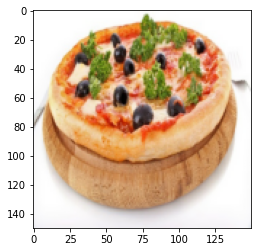

In [ ]:
flat_data=[]
url= input('ENTER YOUR URL') #Make sure the url ends with .jpg
img= imread(url) 
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')